In [1]:
# Loading data
# data from kaggle: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dO = pd.read_csv('/Users/anand/Documents/Datasets/digit-recognizer/train.csv')

In [2]:
# Saving the label into a variable l
l = dO['label']

In [3]:
# Drop the label feature and store the pixel data in d
d = dO.drop('label', axis=1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


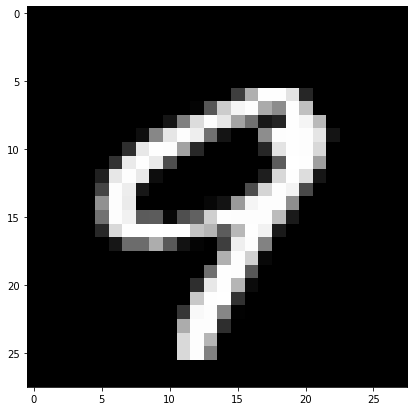

In [5]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 100

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

In [6]:
labels = l.copy()
data = d.copy()

In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


In [8]:
# TSNE
from sklearn.manifold import TSNE 
data_new = standardized_data[0:15000,:]
label_new = labels[0:15000]

# Modelling with default setting

In [9]:
model = TSNE(n_components=2,random_state=0)
# default perplexity = 30
# default learning rate = 200
# default max number of iterations for the optimization = 1000

/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


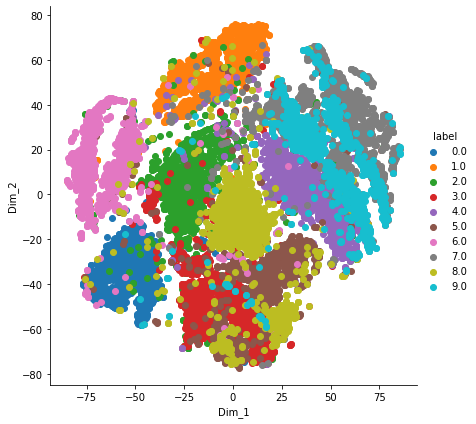

In [10]:
tsne_data = model.fit_transform(data_new)

# creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_new)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='label', height=6, aspect=1).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Changing default settings

/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


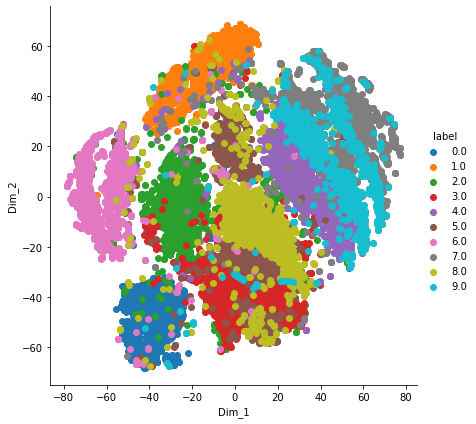

In [11]:
model = TSNE(n_components=2,random_state=0, perplexity=50)
# default learning rate = 200
# default max number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_new)

# creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_new)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='label', height=6, aspect=1).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [12]:
model = TSNE(n_components=2,random_state=0, perplexity=50)
# default learning rate = 200
# default max number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data[0:42000,:])


/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 42000 and the array at index 1 has size 15000

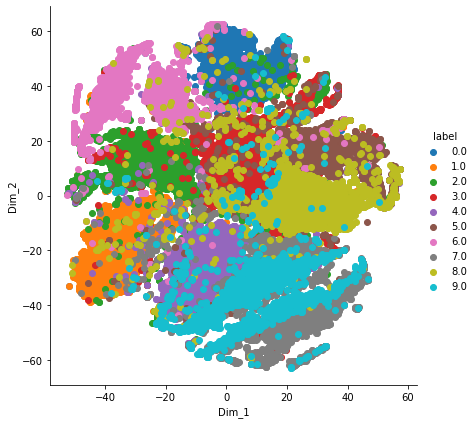

In [13]:

# creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:42000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='label', height=6, aspect=1).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anand/opt/anaconda3/envs/analytics/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


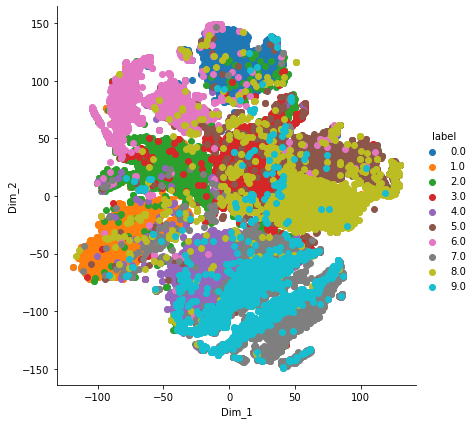

In [14]:
model = TSNE(n_components=2,random_state=0, perplexity=50,n_iter=3000)
# default learning rate = 200
# default max number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data[0:42000,:])

# creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:42000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='label', height=6, aspect=1).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()